# 8 - Simulating Specific Frequencies

This example covers how we change the frequency range and sampling we consider when using MPT-Calculator.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path='/Users/cgledger/Coding/MPT-Calculator_v2/MPT-Calculator'
os.chdir(Your_Path)
os.getcwd()

'/Users/cgledger/Coding/MPT-Calculator_v2/MPT-Calculator'

## Defining a range of frequencies:
By default MPT-Calculator considers frequecies from $10^1$ rad/s to $10^8$ rad/s in 40 logarithmically spaced points.
This can be changed by specifying the starting exponent (e.g. 1), the finishing exponent (e.g. 8), and the number of samples used in the frequency sweep. These are provided to the function as an optional tuple argument in the form
```python
main(start_stop=(Start,Finish,Points))
```
As an example specifying
```python
main(start_stop=(3,6,10))
```
will run a frequency sweep from $10^3$ rad/s to $10^6$ rad/s in 10 logarithmically spaced points.

sphere.geo
generating mesh
 mesh contains 7592 elements
 solved theta0 problems    
Frequency Sweep complete


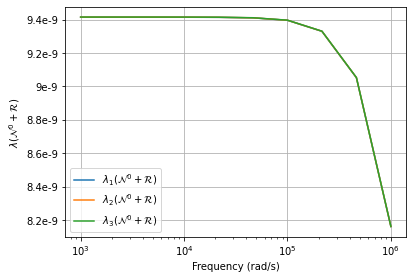

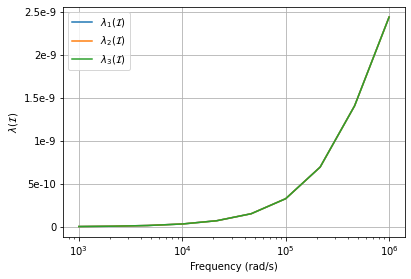

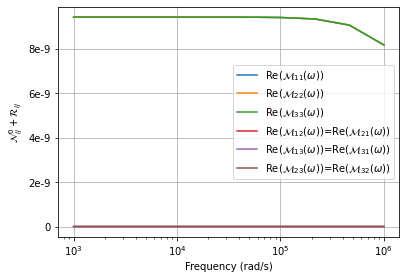

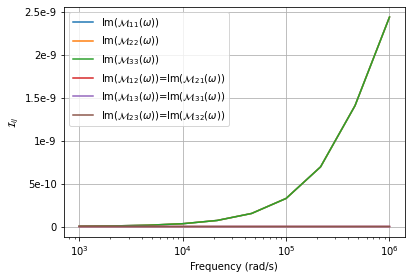

In [2]:
from main import main;
main(start_stop=(3,6,10));

## Simulating Specific Frequencies:
We can also specify an specific frequencies to be used via the $\texttt{frequency_array}$ option. Using this, we can specify a non-logarithmically spaced set of frequencies to be evaluated.


sphere.geo
generating mesh
 mesh contains 7592 elements
 solved theta0 problems    
Frequency Sweep complete


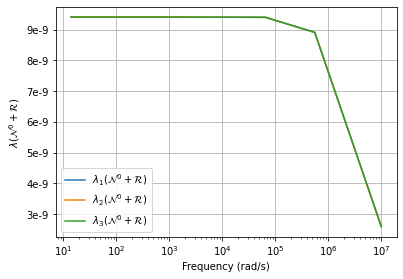

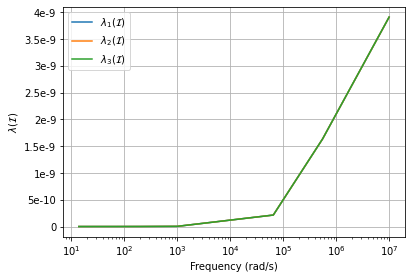

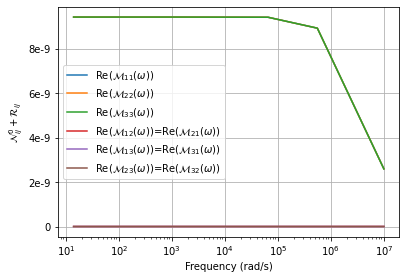

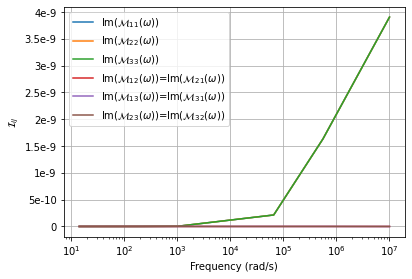

In [3]:
frequencies = [14, 15, 76, 207, 1003, 65311, 555555, 10**7];
main(frequency_array=frequencies);

## POD

Unlike the $\texttt{start_stop}$ argument, the $\texttt{frequency_array}$ argument does not alter the frequency snapshots used by the POD option, only the evaluation points.

When using the POD option, $\texttt{start_stop}$ would define the limits of the POD snapshots, and $\texttt{frequency_array}$ would define the evaluation frequencies. For example
```python
main(start_stop=(3,6,10), frequency_array=frequencies, use_POD=True)
```
would specify a range of POD frequency snapshots between $10^3$ rad/s and $10^6$ rad/s. The reduced order model would then be evaluated only at the frequencies defined by $\texttt{frequencies}$. However, if the interest is only in a very small number of frequencies it would be better to not use POD and just to compute full order solutions at those frequencies. POD is best suited when a large number of outputs is desired as these can be obtained from a small number of full order snapshot solutions.

sphere.geo
generating mesh
 mesh contains 7592 elements
 solved theta0 problems    
manually closed pool
 SVD complete                
manually closed poolder model
 reduced order systems solved          
 frequency sweep complete


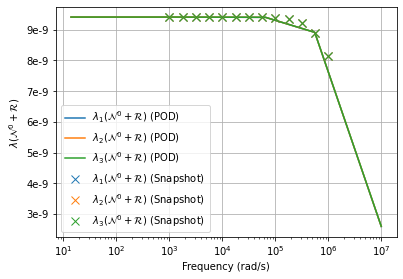

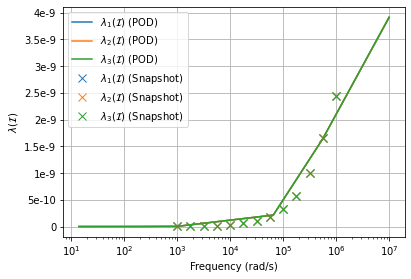

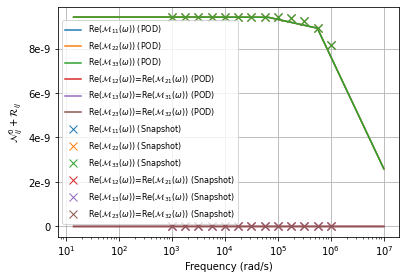

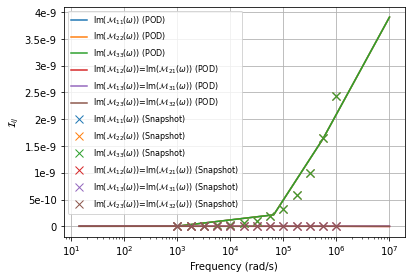

In [4]:
main(start_stop=(3,6,40),frequency_array=frequencies, use_POD=True);